In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  datasets, model_selection, linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, LogisticRegression
%matplotlib inline

In [4]:
x, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=42)

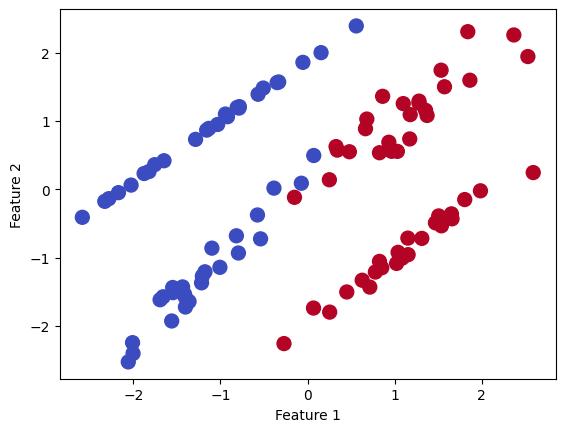

In [11]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap=plt.cm.coolwarm)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [12]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.8, random_state=42)

In [60]:
# Develop the SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', gamma="auto")
model

SVC(gamma='auto', kernel='linear')

In [61]:
model.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [62]:
predictions = model.predict(x_test)

In [58]:
# Evaluate the test result
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

[[10  1]
 [ 0  9]]


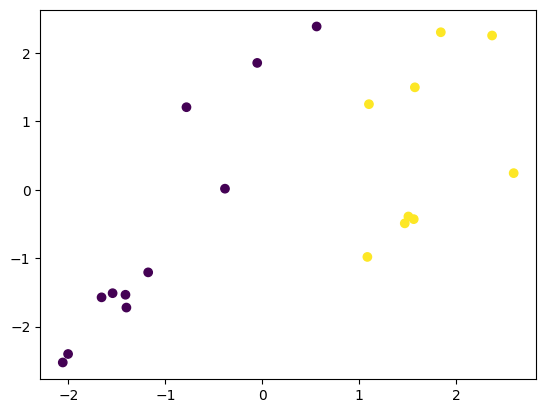

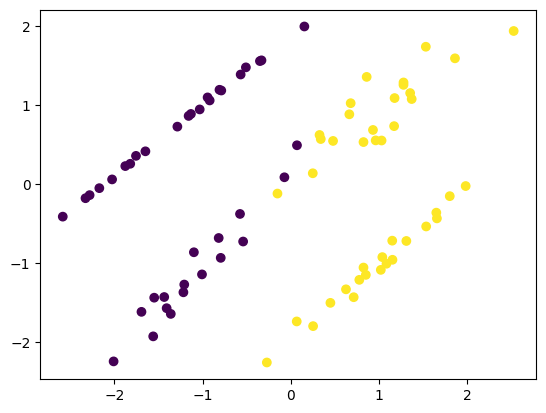

In [34]:
plt.figure()
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.show()
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()

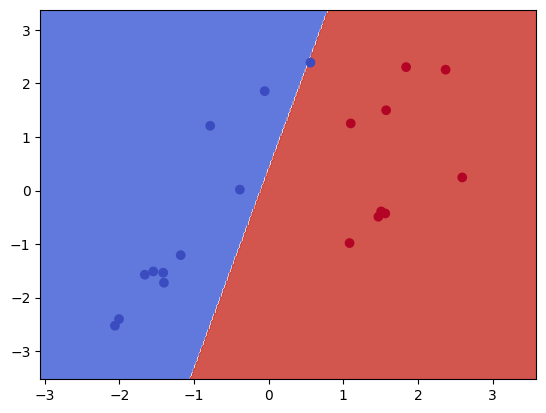

In [63]:
def plot_decision_boundary(classifier, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
   
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)
   
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.9)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)

plt.figure()
plot_decision_boundary(model, x_test, y_test)
plt.show()

In [35]:
# Try to use different kernel function
# (A) RBF
model_rbf = SVC(kernel="rbf", gamma="auto")
model_rbf.fit(x_train, y_train)
predictions_rbf = model_rbf.predict(x_test)
print(metrics.classification_report(y_test, predictions_rbf))
print(metrics.confusion_matrix(y_test, predictions_rbf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[11  0]
 [ 0  9]]


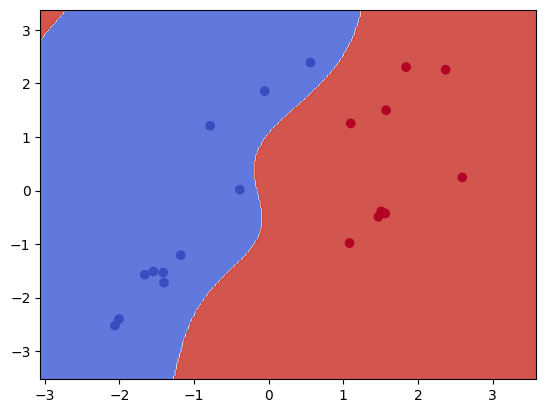

In [37]:
plt.figure()
plot_decision_boundary(model_rbf, x_test, y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

[[6 5]
 [4 5]]


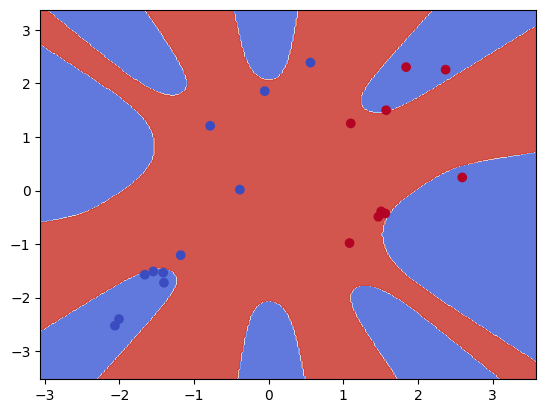

In [70]:
# Try out the other different kernel fucntions and see the difference for the boundary map
# try poly and sigmoid
model_rbf = SVC(kernel="poly", gamma="auto", degree=10)
model_rbf.fit(x_train, y_train)
predictions_rbf = model_rbf.predict(x_test)
print(metrics.classification_report(y_test, predictions_rbf))
print(metrics.confusion_matrix(y_test, predictions_rbf))
plt.figure()
plot_decision_boundary(model_rbf, x_test, y_test)
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

[[10  1]
 [ 0  9]]


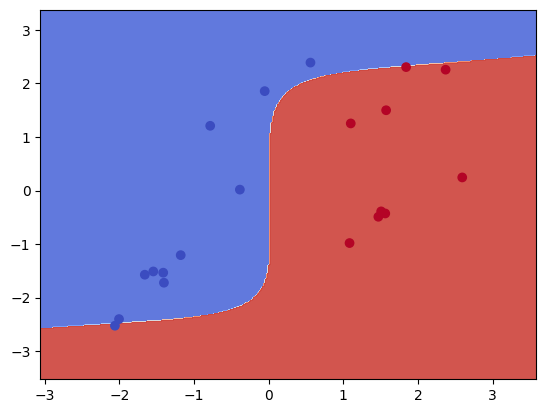

In [66]:
model_rbf = SVC(kernel="sigmoid", gamma="auto")
model_rbf.fit(x_train, y_train)
predictions_rbf = model_rbf.predict(x_test)
print(metrics.classification_report(y_test, predictions_rbf))
print(metrics.confusion_matrix(y_test, predictions_rbf))
plt.figure()
plot_decision_boundary(model_rbf, x_test, y_test)
plt.show()


In [99]:
# This time, practice on a dataset
# Practice on sklearn,dataset.load_iris()

#1.  Data Loading

from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
dir(data)
x, y = load_iris(return_X_y=True, as_frame=False)
df = data.frame
#2. EDA

#3. Datas preprocessing

#4. Data splitting

#5. Feature scalling

#6. model development

#7. Model evaluation


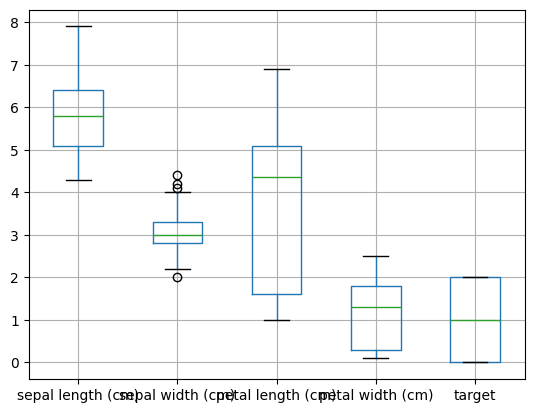

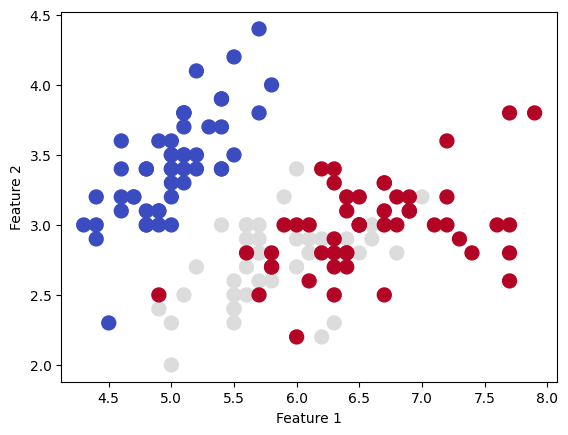

In [93]:
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap=plt.cm.coolwarm)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [83]:
# 2. EDA
df = data.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [84]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [89]:
#3. Datas preprocessing
print(df.isna().sum())
print(df.duplicated())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [90]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [94]:
#4. Data splitting
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.8, random_state=42)

In [95]:
#5. Feature scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [107]:
#6. model development
model_new = SVC(kernel='linear', gamma="auto")
model_new.fit(x_train, y_train)
# model.fit(x_test_scaled, y_train)
#7. Model evaluation

SVC(gamma='auto', kernel='linear')

In [109]:
# 8. Model Evalution
predictions = model_new.predict(x_test)
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [100]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [101]:
print(df.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [111]:
print(df.duplicated().sum())

1


In [110]:
# data spiling
label = df.pop('target')
x_train, x_test, y_train, y_test = model_selection.train_test_split(df, label, train_size=0.8, random_state=42)

KeyError: 'target'

In [ ]:
# 5. Feature Scaling
standard_scsaler = preprocessing.StandardScaler()
x_train = standard_scsaler.t

In [112]:
model = SVC(kernel='linear', random_state=42)+

# Train the model
model.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [116]:
plt.figure()
plot_decision_boundary(model, x_test, y_test)
plt.show()


ValueError: X has 2 features, but SVC is expecting 4 features as input.